<h2 style='text-align: right;'> Vinayasree Kalburgi </h2>

# <b><u> Project Title : Avacado Price Prediction </u></b>

## Project Description


### Introduction

Your client for this project is a major Avocado Producer.

- Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

Current Scenario

- Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.
- Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

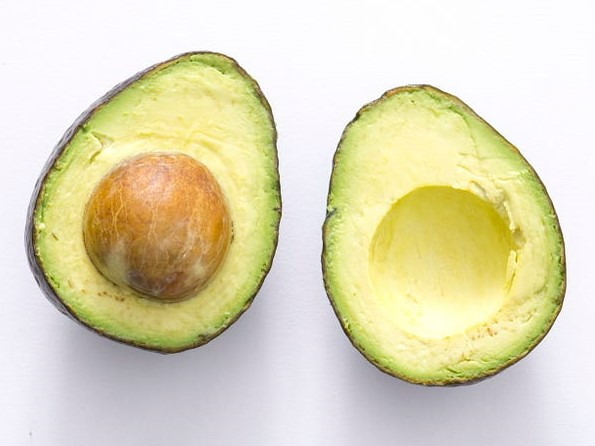

### Problem Statement

The current process suffers from the following problems:

- The price of avocado is dependent on global demands and seasonal production.
- Due to these reasons, it is quite difficult to know for certain the price in the future.

##### Your Role
- You are given a dataset containing the weekly retail scan data of avocadoes.
- Your task is to build a regression model using the dataset.
- You need to build the best possible model.

##### Project Deliverables
- Deliverable: Predict the average price of a single avocado.
- Machine Learning Task: Regression
- Target Variable: AveragePrice
- Win Condition: N/A (best possible model)

##### Evaluation Metric
- The model evaluation will be based on the RMSE score.

### Data acquisition and Description

The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column AveragePrice is the average price of a single avocado.

This is the data that we have to predict for future samples.


The dataset is divided into two parts: Train and Test sets.

##### Train Set:
The train set contains 14599 rows and 14 columns.
The last column AveragePrice is the target variable.

##### Test Set:
The test set contains 3650 rows and 13 columns.
The test set doesn’t contain the AveragePrice column.
It needs to be predicted for the test set.

|Id|Feature|Description|
|:--|:--|:--|
|01|Id	|Unique identity of each observation|
|02|Date	|The date of the observation|
|03|AveragePrice	|The average price of a single avocado|
|04|Total Volume	|Total number of avocados sold|
|05|4046	|Total number of avocados with PLU 4046 sold|
|06|4225	|Total number of avocados with PLU 4225 sold|
|07|4770	|Total number of avocados with PLU 4770 sold|
|08|Total Bags	|Total number of bags sold|
|09|Small Bags	|Total number of small bags sold|
|10|Large Bags	|Total number of large bags sold|
|11|sugarpercent	|Total number of extra-large bags sold|
|12|type	|Type of an avocado (conventional or organic)|
|13|year	|The year of observation|
|14|Region	|The city or region of the observation|

### Importing and Installing Libraries

In [ ]:
#!pip install -q datascience                                         
#!pip install -q pandas-profiling                                    

In [ ]:
#!pip install -q --upgrade pandas-profiling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                               
%matplotlib inline
import scipy as sp
import warnings                                                     
warnings.filterwarnings("ignore") 


from pandas_profiling import ProfileReport                              

##### Data Information

In [2]:
avacado_price_pred = pd.read_csv('avocado_train.csv')
avacado_price_pred.head(5)

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [3]:
avacado_price_pred.shape

(14599, 14)

In [4]:
avacado_price_pred.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
avacado_price_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


In [6]:
avacado_price_pred.isnull().sum()

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
avacado_price_pred.nunique()

Id              14599
Date              169
AveragePrice      256
Total Volume    14592
4046            14190
4225            14495
4770             9783
Total Bags      14500
Small Bags      13907
Large Bags      12138
XLarge Bags      4506
type                2
year                4
region             54
dtype: int64

In [8]:
avacado_price_pred.AveragePrice.value_counts().sort_values(ascending= False)

1.15    168
1.18    164
1.26    158
1.19    156
1.59    154
       ... 
0.52      1
0.48      1
3.12      1
2.78      1
3.17      1
Name: AveragePrice, Length: 256, dtype: int64

In [9]:
avacado_price_pred.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
avacado_price_pred['AveragePrice'].max()

3.25

In [11]:
avacado_price_pred['AveragePrice'].min()

0.44

In [12]:
avacado_price_pred['year'].value_counts()

2017    4585
2016    4509
2015    4487
2018    1018
Name: year, dtype: int64

In [13]:
avacado_price_pred['type'].value_counts()

conventional    7301
organic         7298
Name: type, dtype: int64

In [14]:
avacado_price_pred['region'].value_counts().count()

54

In [15]:
avacado_price_pred['Date'] = pd.to_datetime(avacado_price_pred['Date'])

In [16]:
avacado_price_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            14599 non-null  int64         
 1   Date          14599 non-null  datetime64[ns]
 2   AveragePrice  14599 non-null  float64       
 3   Total Volume  14599 non-null  float64       
 4   4046          14599 non-null  float64       
 5   4225          14599 non-null  float64       
 6   4770          14599 non-null  float64       
 7   Total Bags    14599 non-null  float64       
 8   Small Bags    14599 non-null  float64       
 9   Large Bags    14599 non-null  float64       
 10  XLarge Bags   14599 non-null  float64       
 11  type          14599 non-null  object        
 12  year          14599 non-null  int64         
 13  region        14599 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.6+ MB


### 5. Data Pre-Profiling

In [17]:
Profile = ProfileReport(df = avacado_price_pred)
Profile.to_file(output_file = 'Pre Profile Report of Avacado Price Prediction.html')
print('Done')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Done


## Exploratory Data Analysis

**Which type of Avocados are more in demand?**

In [17]:
avacado_price_pred.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Text(0.5, 1.0, 'Avocados in Demand')

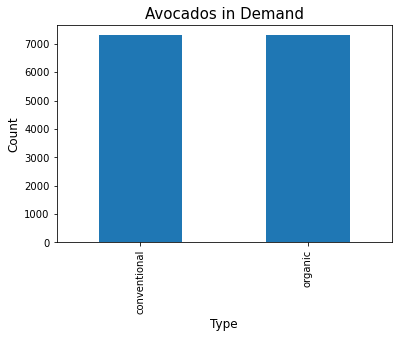

In [18]:
avacado_price_pred['type'].value_counts().plot.bar()
plt.xlabel('Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Avocados in Demand', fontsize = 15)

**Total Sales of Avacado year wise**

Text(0.5, 1.0, 'Avocados Sold')

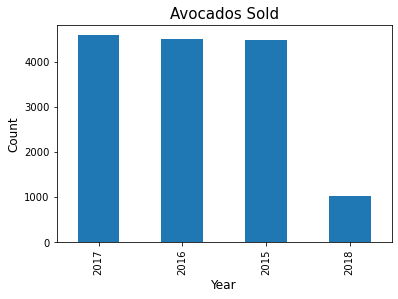

In [19]:
avacado_price_pred['year'].value_counts().plot.bar()
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Avocados Sold', fontsize = 15)

**Average Price range of Avacado**

Text(0.5, 1.0, 'Distribution of AveragePrice')

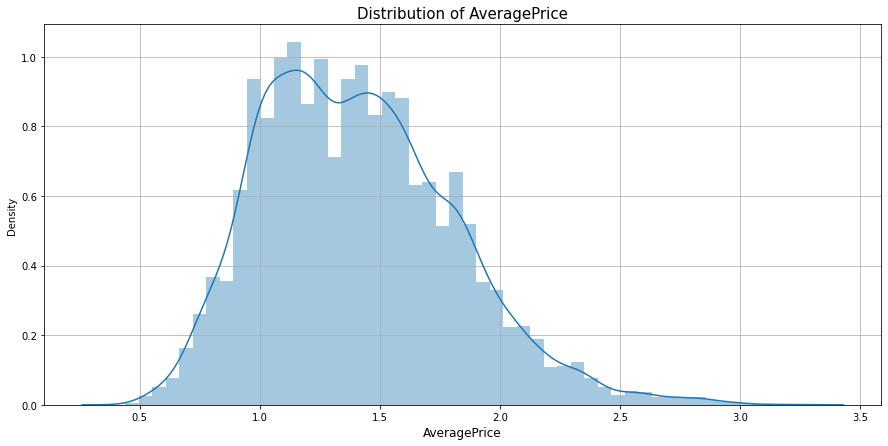

In [20]:
fig = plt.figure(figsize= (15,7))
sns.distplot(avacado_price_pred['AveragePrice'], kde = True)

plt.xlabel(xlabel='AveragePrice', size=12)
plt.grid(b=True)
plt.title(label='Distribution of AveragePrice', size=15)

**Based on the region, Average Price range distribution**

Text(0.5, 1.0, 'Average Price ')

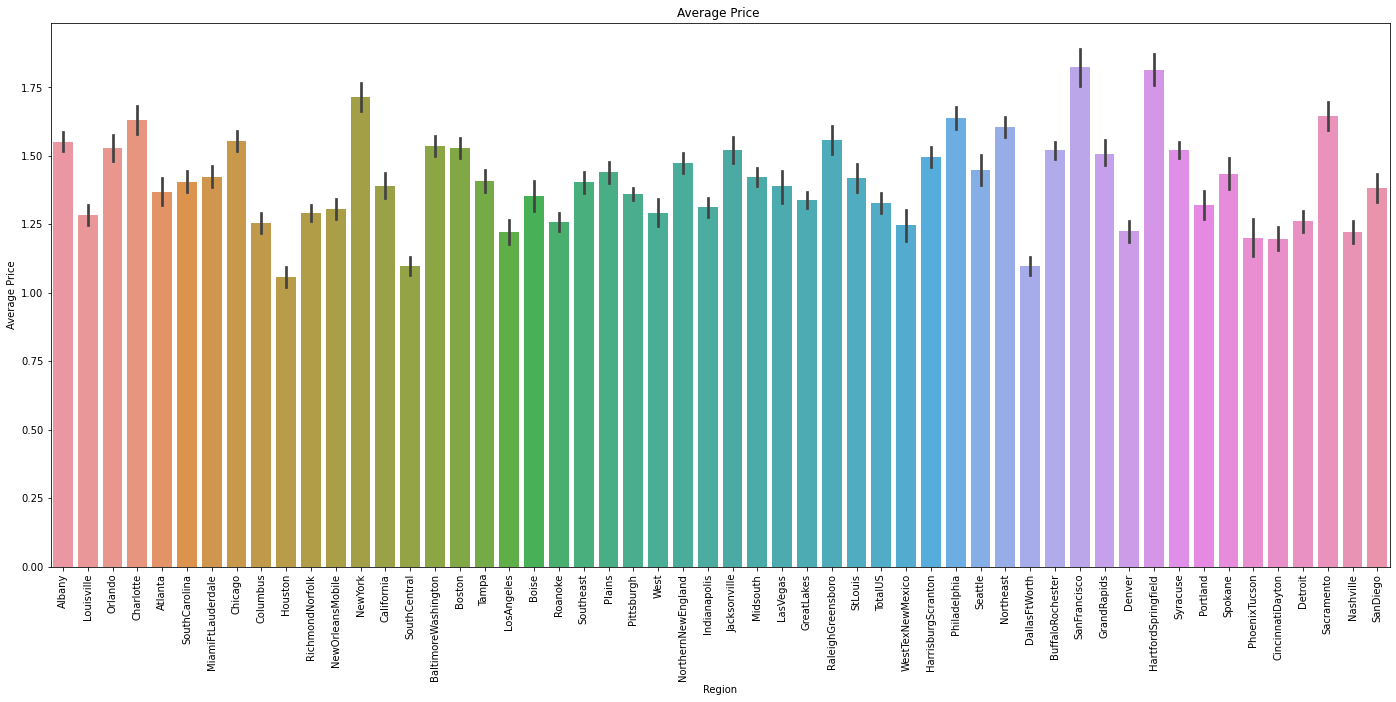

In [21]:
plt.figure(figsize=(24,10))
ax=sns.barplot(x='region',y='AveragePrice', data = avacado_price_pred)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price ')

Text(0.5, 1.0, 'Average Total Volume of Avocado According to Region')

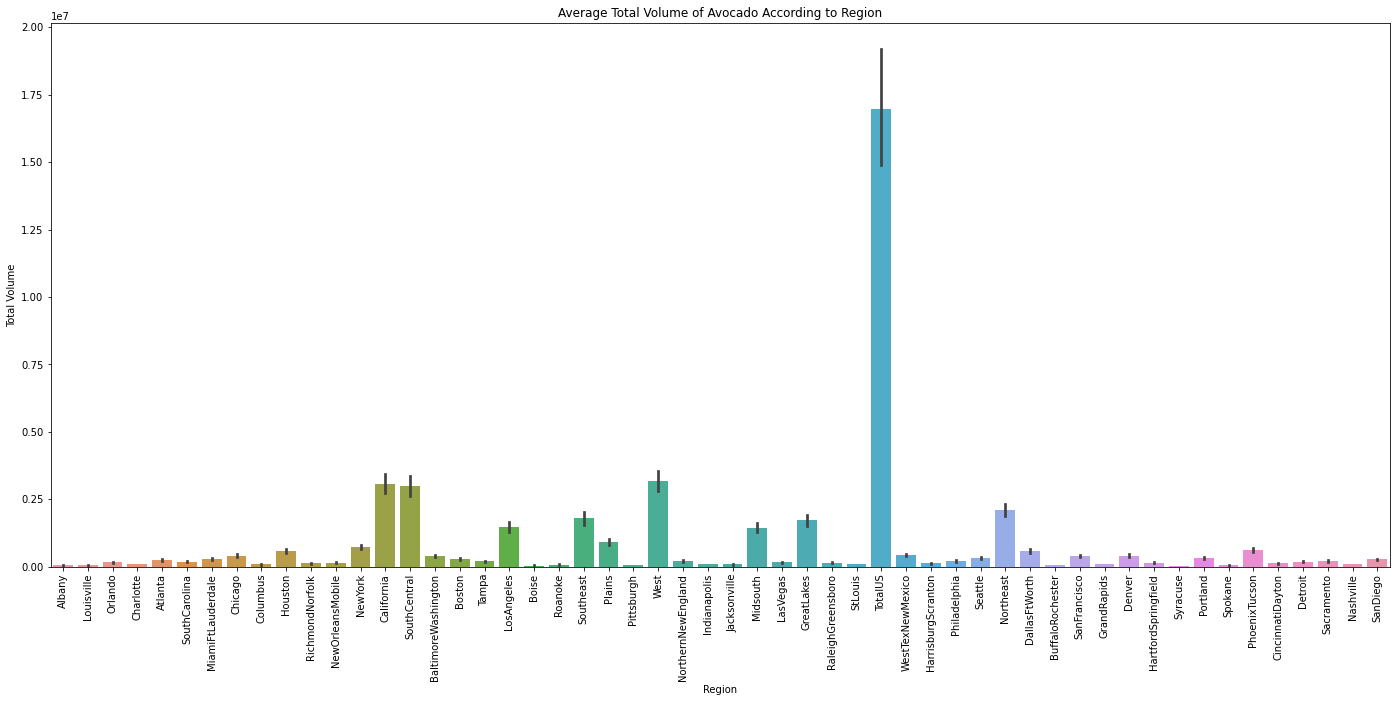

In [22]:
plt.figure(figsize=(24,10))
ax=sns.barplot(x='region',y='Total Volume', data = avacado_price_pred)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Average Total Volume of Avocado According to Region')

**Average Price Distribution over Months and Years**

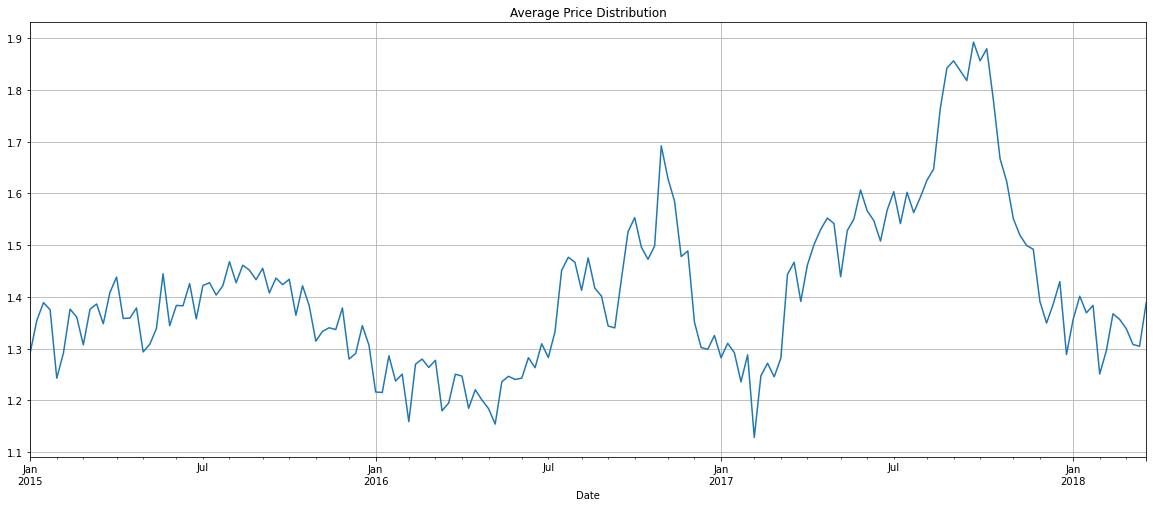

In [23]:
Date=avacado_price_pred.groupby('Date').mean()
plt.figure(figsize=(20,8))
Date['AveragePrice'].plot()
plt.title('Average Price Distribution')
plt.grid(b=True)

**Heatmap**

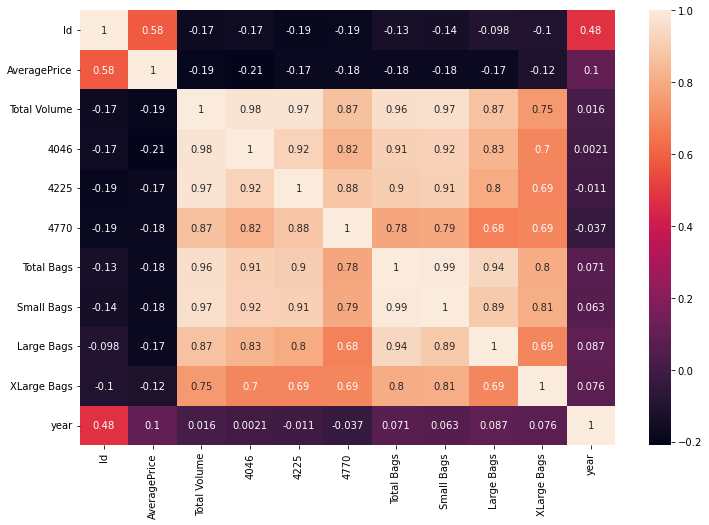

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(avacado_price_pred.corr(),annot=True)
plt.show()

## Model Building

**Encoding**

In [26]:
train_data = pd.get_dummies(avacado_price_pred.drop(['region','Date'],axis=1),drop_first=True)
train_data.head(5)

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,14761,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,2017,1
1,6843,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,2017,0
2,7306,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,2017,0
3,12329,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,2016,1
4,12036,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,2016,1


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   AveragePrice  14599 non-null  float64
 2   Total Volume  14599 non-null  float64
 3   4046          14599 non-null  float64
 4   4225          14599 non-null  float64
 5   4770          14599 non-null  float64
 6   Total Bags    14599 non-null  float64
 7   Small Bags    14599 non-null  float64
 8   Large Bags    14599 non-null  float64
 9   XLarge Bags   14599 non-null  float64
 10  year          14599 non-null  int64  
 11  type_organic  14599 non-null  uint8  
dtypes: float64(9), int64(2), uint8(1)
memory usage: 1.2 MB


### Linear Regression

In [35]:
x = train_data.drop('AveragePrice',axis=1)
y = train_data['AveragePrice']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11679, 11)
(11679,)
(2920, 11)
(2920,)


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linR = LinearRegression()

In [44]:
linR.fit(x_train,y_train)

LinearRegression()

In [45]:
linR.coef_

array([ 2.02460548e-05, -3.94332909e-05,  3.93400074e-05,  3.95441179e-05,
        3.90535174e-05, -3.40199740e-03,  3.44143881e-03,  3.44127808e-03,
        3.44295400e-03, -1.26896573e-02,  2.99724592e-01])

In [70]:
y_train_pred_lr =linR.predict(x_train)
y_test_pred_lr = linR.predict(x_test)

In [71]:
from sklearn import metrics

In [88]:
print('RMSE of Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))
print('RMSE of Test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))

RMSE of Train: 0.30859578782254904
RMSE of Test: 0.32033657936028787


In [89]:
print("R Squared Value of Train:", metrics.r2_score(y_train,y_train_pred_lr))
print("R Squared Value of Test:", metrics.r2_score(y_test, y_test_pred_lr))

R Squared Value of Train: 0.40762955104556153
R Squared Value of Test: 0.41200552175943106


Based on the R Squared, RMSE values and Scatter plot, we can conclude that its not a good Model

### Decision Trees

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [54]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_train_pred_dt = dtree.predict(x_train)
y_test_pred_dt = dtree.predict(x_test)

Text(0, 0.5, 'Y Predicted')

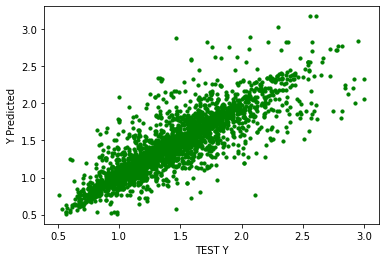

In [56]:
plt.scatter(x = y_test,y = y_test_pred_dt, s = 10, c = 'green')
plt.xlabel('TEST Y')
plt.ylabel('Y Predicted')

In [58]:
print('RMSE of Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_dt)))
print('RMSE of Test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dt)))

RMSE of Train: 8.154130830961496e-18
RMSE of Test: 0.22595482334258948


In [59]:
print("R Squared Value of Train:", metrics.r2_score(y_train,y_train_pred_dt))
print("R Squared Value of Test:", metrics.r2_score(y_test, y_test_pred_dt))

R Squared Value of Train: 1.0
R Squared Value of Test: 0.7074477698928134


### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()

In [62]:
randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_train_pred_rf = randomforest.predict(x_train)
y_test_pred_rf = randomforest.predict(x_test)

In [64]:
print('RMSE of Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)))
print('RMSE of Test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf)))

RMSE of Train: 0.05899482400477517
RMSE of Test: 0.1596884564925915


In [65]:
print("R Squared Value of Train:",metrics.r2_score(y_train,y_train_pred_rf))
print("R Squared Value of Test:", metrics.r2_score(y_test, y_test_pred_rf))

R Squared Value of Train: 0.9783508316752823
R Squared Value of Test: 0.8538808199594163


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

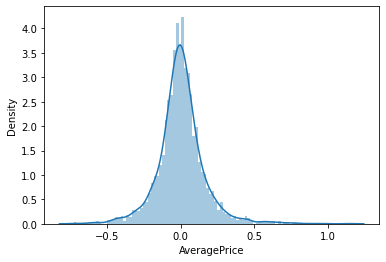

In [67]:
sns.distplot((y_test-y_test_pred_rf),bins=100)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

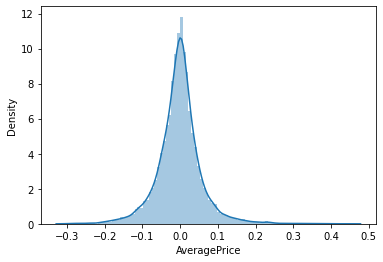

In [68]:
sns.distplot((y_train-y_train_pred_rf),bins=100)

Text(0, 0.5, 'Y Predicted')

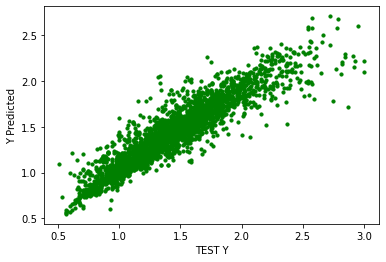

In [69]:
plt.scatter(x = y_test,y = y_test_pred_rf, s = 10, c = 'green')
plt.xlabel('TEST Y')
plt.ylabel('Y Predicted')

In [78]:
avacado_price_prediction_actual_Test = pd.read_csv('avocado_test.csv')

In [84]:
avacado_price_prediction_actual_Test.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [82]:
avacado_price_prediction_actual_Test.shape

(3650, 13)

In [81]:
avacado_price_prediction_actual_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 370.8+ KB


In [85]:
avacado_price_prediction_actual_Test = pd.get_dummies(avacado_price_prediction_actual_Test.drop(['region','Date'],axis=1),drop_first=True)
avacado_price_prediction_actual_Test.head(5)

,Id,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,11137,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,2015,1
1,16503,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,2017,1
2,6438,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,2017,0
3,8247,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,2017,0
4,10481,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,2015,1


In [87]:
avacado_price_prediction_actual_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Total Volume  3650 non-null   float64
 2   4046          3650 non-null   float64
 3   4225          3650 non-null   float64
 4   4770          3650 non-null   float64
 5   Total Bags    3650 non-null   float64
 6   Small Bags    3650 non-null   float64
 7   Large Bags    3650 non-null   float64
 8   XLarge Bags   3650 non-null   float64
 9   year          3650 non-null   int64  
 10  type_organic  3650 non-null   uint8  
dtypes: float64(8), int64(2), uint8(1)
memory usage: 288.8 KB


In [90]:
y_actual_test_pred = linR.predict(avacado_price_prediction_actual_Test)

In [91]:
print(y_actual_test_pred.shape)

(3650,)


In [92]:
avacado_test_df = pd.read_csv('avocado_test.csv')

In [95]:
df1 = pd.DataFrame({'x':avacado_test_df['Id'], 'y': y_actual_test_pred})

In [96]:
df1.to_csv('output.csv',index=False, header=False)

### Summary and Conclusion

As our conclusion we proclaim that, using k-fold cross validation as the basis for model selection we declare random forest model as the best suited model for our purpose of predicting average avocado prices